In [1]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import gc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = dd.read_csv('./review-1/processed_data.csv')

In [3]:
data.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46'],
      dtype='object')

In [23]:
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,37,38,39,40,41,42,43,44,45,46
0,0,53.0,17.0,2291.0,1.0,1.0,49.0,49.0,49.0,49.000000,...,49.000000,-1.0,-1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,80.0,6.0,5785762.0,3.0,1.0,0.0,0.0,0.0,0.000000,...,0.000000,8192.0,8192.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,80.0,6.0,13513.0,3.0,4.0,287.0,287.0,0.0,95.666667,...,95.666667,65535.0,219.0,20.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,80.0,6.0,1610.0,3.0,4.0,308.0,308.0,0.0,102.666667,...,102.666667,65535.0,219.0,20.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,53.0,17.0,1115.0,1.0,1.0,36.0,36.0,36.0,36.000000,...,36.000000,-1.0,-1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data = data.drop(['Unnamed: 0'],axis=1)

In [5]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46'],
      dtype='object')

In [7]:
data.iloc[:,46].describe().compute()

count    1.513949e+07
mean     1.702228e-01
std      3.758284e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: 46, dtype: float64

In [6]:
data.columns = ['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min',
       'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Bwd IAT Tot',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd PSH Flags', 'Fwd URG Flags', 'Fwd Pkts/s', 'Bwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'Down/Up Ratio', 'Fwd Seg Size Avg',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Min','Label']

In [9]:
data.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Bwd Pkt Len Max,...,Fwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Min,Label
0,53.0,17.0,2291.0,1.0,1.0,49.0,49.0,49.0,49.000000,164.0,...,49.000000,-1.0,-1.0,8.0,0.0,0.0,0.0,0.0,0.0,0
1,80.0,6.0,5785762.0,3.0,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,8192.0,8192.0,20.0,0.0,0.0,0.0,0.0,0.0,0
2,80.0,6.0,13513.0,3.0,4.0,287.0,287.0,0.0,95.666667,935.0,...,95.666667,65535.0,219.0,20.0,0.0,0.0,0.0,0.0,0.0,1
3,80.0,6.0,1610.0,3.0,4.0,308.0,308.0,0.0,102.666667,935.0,...,102.666667,65535.0,219.0,20.0,0.0,0.0,0.0,0.0,0.0,1
4,53.0,17.0,1115.0,1.0,1.0,36.0,36.0,36.0,36.000000,73.0,...,36.000000,-1.0,-1.0,8.0,0.0,0.0,0.0,0.0,0.0,0


In [8]:
data = data.astype({'Label': np.int8}).compute()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15139493 entries, 0 to 201253
Data columns (total 47 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           float64
 1   Protocol           float64
 2   Flow Duration      float64
 3   Tot Fwd Pkts       float64
 4   Tot Bwd Pkts       float64
 5   TotLen Fwd Pkts    float64
 6   Fwd Pkt Len Max    float64
 7   Fwd Pkt Len Min    float64
 8   Fwd Pkt Len Mean   float64
 9   Bwd Pkt Len Max    float64
 10  Bwd Pkt Len Min    float64
 11  Bwd Pkt Len Mean   float64
 12  Flow Byts/s        float64
 13  Flow Pkts/s        float64
 14  Flow IAT Mean      float64
 15  Flow IAT Std       float64
 16  Flow IAT Max       float64
 17  Flow IAT Min       float64
 18  Bwd IAT Tot        float64
 19  Bwd IAT Mean       float64
 20  Bwd IAT Std        float64
 21  Bwd IAT Max        float64
 22  Bwd IAT Min        float64
 23  Fwd PSH Flags      float64
 24  Fwd URG Flags      float64
 25  Fwd Pkts/s        

In [13]:
data.groupby('Label').count()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Bwd Pkt Len Max,...,Down/Up Ratio,Fwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,
0,12562406,12562406,12562406,12562406,12562406,12562406,12562406,12562406,12562406,12562406,...,12562406,12562406,12562406,12562406,12562406,12562406,12562406,12562406,12562406,12562406
1,2577087,2577087,2577087,2577087,2577087,2577087,2577087,2577087,2577087,2577087,...,2577087,2577087,2577087,2577087,2577087,2577087,2577087,2577087,2577087,2577087


In [11]:
x_data = data.iloc[:,0:46]


In [12]:
y = data['Label']

In [13]:
type(y)

pandas.core.series.Series

In [14]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: Label, dtype: int8

In [15]:
del x_data
gc.collect()

2171

In [15]:
x_data.columns

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min',
       'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Bwd IAT Tot',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd PSH Flags', 'Fwd URG Flags', 'Fwd Pkts/s', 'Bwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'Down/Up Ratio', 'Fwd Seg Size Avg',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Min'],
      dtype='object')

In [19]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: Label, dtype: int64

In [17]:
scaler = StandardScaler()
scaler.fit(x_data)

StandardScaler()

In [18]:
scaled_data = scaler.transform(x_data)

In [19]:
scaled_data.shape

(15139493, 46)

### Finding the best 'k'(no of principle components) to keep that would retain 95% of the variance

In [20]:
Covar = np.cov(scaled_data,rowvar=False)

In [21]:
u,s,v = np.linalg.svd(Covar)

In [22]:
print(type(s))

<class 'numpy.ndarray'>


In [23]:
s.shape

(46,)

In [24]:
print(s)

[8.02820000e+00 5.49458371e+00 4.63079496e+00 3.10765677e+00
 2.91435232e+00 2.27313995e+00 1.92851292e+00 1.79245128e+00
 1.56675251e+00 1.24624533e+00 1.19356159e+00 1.03503526e+00
 1.00530854e+00 9.82521760e-01 9.32144812e-01 9.02507730e-01
 8.01295423e-01 7.86831149e-01 6.74541823e-01 6.67047296e-01
 5.86351744e-01 4.95097406e-01 4.76623715e-01 4.01538698e-01
 3.80324614e-01 3.10584709e-01 2.56979315e-01 2.32756077e-01
 2.13025049e-01 1.47164120e-01 1.30119065e-01 1.26929611e-01
 6.97965696e-02 6.56744498e-02 4.99481466e-02 3.21786307e-02
 2.06632037e-02 1.26347061e-02 9.88487372e-03 6.87335957e-03
 5.87944735e-03 5.08076716e-03 2.29059515e-04 1.80575970e-04
 3.56523700e-15 5.97971324e-16]


In [25]:
vs = np.sum(s)

In [26]:
print(vs)

46.00000303841404


In [37]:
def find_k(s):
    ss =0
    k = 0
    for i in s:
        k = k+1
        ss = ss + i
        #print(ss/vs)
        if(ss/vs>=0.95):
            return k

In [38]:
k = find_k(s)
print(k)

24


### Running PCA , reducing the feature space to k dimensions

In [ ]:
pca = PCA(n_components=k)
principalComponents = pca.fit_transform(scaled_data)


In [44]:
principalComponents.shape

(15139493, 24)

In [47]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc 1', 'pc 2','pc 3','pc 4','pc 5','pc 6','pc 7','pc 8','pc 9','pc 10','pc 11','pc 12','pc 13','pc 14','pc 15','pc 16','pc 17','pc 18','pc 19','pc 20','pc 21','pc 22','pc 23','pc 24'])

In [48]:
pd.DataFrame.to_csv(principalDf,'./review-1/pca_data.csv')

In [49]:
type(data)

pandas.core.frame.DataFrame

: 

In [16]:
pca_data = dd.read_csv('./review-1/pca_data.csv')

In [8]:
len(pca_data)

15139493

In [17]:
pca_data.head()

,Unnamed: 0,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,...,pc 15,pc 16,pc 17,pc 18,pc 19,pc 20,pc 21,pc 22,pc 23,pc 24
0,0,-2.192831,1.800494,3.308019,-0.277914,0.101557,0.665639,0.288985,-0.101940,0.183272,...,-0.013191,0.009942,0.034580,0.179227,-0.389620,0.051956,-0.043799,0.184138,-0.157453,0.200664
1,1,-0.863878,-0.577439,-0.788067,0.101133,-0.256703,-0.661505,-1.254593,-0.008865,-1.333032,...,0.033110,-0.032890,-0.009684,0.218655,0.453664,0.014732,0.354162,0.252695,0.095973,0.317483
2,2,2.560048,1.631406,-1.388237,-0.106714,0.972766,0.576218,-0.581675,-0.126118,-1.053229,...,-0.305880,-0.142796,2.854059,0.137400,-0.761497,0.052937,0.547460,-0.187990,0.099782,-0.768947
3,3,2.628972,1.694180,-1.410315,-0.108249,0.961122,0.655940,-0.443210,-0.132679,-1.024972,...,-0.328063,-0.149089,2.859057,0.096367,-0.689529,-0.008184,0.650076,-0.187266,0.097003,-0.722929
4,4,-2.286393,1.138013,2.272099,-0.141066,0.032071,0.226134,-0.073383,-0.043345,-0.099243,...,-0.107137,-0.020927,0.063157,0.028390,0.169548,0.003086,-0.161875,0.089957,-0.118395,0.169051


In [18]:
pca_data = pca_data.drop(['Unnamed: 0'],axis=1)

In [19]:
pca_data.head()

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10,...,pc 15,pc 16,pc 17,pc 18,pc 19,pc 20,pc 21,pc 22,pc 23,pc 24
0,-2.192831,1.800494,3.308019,-0.277914,0.101557,0.665639,0.288985,-0.101940,0.183272,0.021392,...,-0.013191,0.009942,0.034580,0.179227,-0.389620,0.051956,-0.043799,0.184138,-0.157453,0.200664
1,-0.863878,-0.577439,-0.788067,0.101133,-0.256703,-0.661505,-1.254593,-0.008865,-1.333032,-0.024711,...,0.033110,-0.032890,-0.009684,0.218655,0.453664,0.014732,0.354162,0.252695,0.095973,0.317483
2,2.560048,1.631406,-1.388237,-0.106714,0.972766,0.576218,-0.581675,-0.126118,-1.053229,-0.032459,...,-0.305880,-0.142796,2.854059,0.137400,-0.761497,0.052937,0.547460,-0.187990,0.099782,-0.768947
3,2.628972,1.694180,-1.410315,-0.108249,0.961122,0.655940,-0.443210,-0.132679,-1.024972,-0.022419,...,-0.328063,-0.149089,2.859057,0.096367,-0.689529,-0.008184,0.650076,-0.187266,0.097003,-0.722929
4,-2.286393,1.138013,2.272099,-0.141066,0.032071,0.226134,-0.073383,-0.043345,-0.099243,-0.111845,...,-0.107137,-0.020927,0.063157,0.028390,0.169548,0.003086,-0.161875,0.089957,-0.118395,0.169051


In [15]:
pca_data.describe().compute()

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10,...,pc 15,pc 16,pc 17,pc 18,pc 19,pc 20,pc 21,pc 22,pc 23,pc 24
count,1.513949e+07,1.513949e+07,1.513949e+07,1.513949e+07,1.513949e+07,1.513949e+07,1.513949e+07,1.513949e+07,1.513949e+07,1.513949e+07,...,1.513949e+07,1.513949e+07,1.513949e+07,1.513949e+07,1.513949e+07,1.513949e+07,1.513949e+07,1.513949e+07,1.513949e+07,1.513949e+07
mean,-2.689377e-16,2.367792e-16,4.191685e-17,-2.902265e-16,3.958184e-16,2.238041e-16,-3.019485e-17,1.207494e-17,1.424723e-15,1.905306e-15,...,4.071161e-16,9.628374e-16,3.815986e-17,-1.733033e-15,1.159789e-16,-1.439775e-15,1.109918e-15,-1.139741e-16,-2.337543e-16,-7.389122e-16
std,2.833408e+00,2.344053e+00,2.151928e+00,1.762855e+00,1.707147e+00,1.507694e+00,1.388709e+00,1.338825e+00,1.251700e+00,1.116354e+00,...,9.654765e-01,9.500041e-01,8.951511e-01,8.870350e-01,8.213050e-01,8.167296e-01,7.657361e-01,7.036316e-01,6.903794e-01,6.336708e-01
min,-9.610485e+00,-2.354319e+01,-2.468967e+01,-1.993913e+01,-7.458418e+01,-1.248178e+01,-1.878782e+02,-6.325032e+00,-8.662450e+01,-3.640584e+01,...,-1.806774e+02,-5.528329e+01,-8.055620e+01,-1.903892e+02,-7.874071e+00,-1.253143e+02,-1.222416e+02,-2.300740e+01,-3.096415e+01,-4.207222e+01
25%,-2.204109e+00,-1.049132e+00,-1.402220e+00,-1.611644e-01,-3.128459e-01,-8.378382e-01,-6.825984e-01,-8.081070e-02,-6.005343e-01,-2.393851e-01,...,-2.417907e-01,-7.868235e-02,-2.795947e-01,-1.603193e-01,-2.166173e-01,-4.387596e-01,-2.274823e-01,-1.514238e-01,-2.370455e-01,-2.809877e-01
50%,-1.684982e+00,8.496823e-01,-8.974839e-01,-9.384547e-04,3.331210e-02,-6.603716e-02,-4.837343e-02,-2.253094e-02,-7.026255e-02,3.547168e-03,...,-3.024700e-02,-5.723523e-03,4.616117e-02,5.470874e-02,1.361365e-01,-8.533765e-03,-4.706765e-02,2.536472e-02,-3.884736e-02,9.155727e-02
75%,2.240860e+00,1.443555e+00,2.244223e+00,7.051613e-02,3.315711e-01,3.695791e-01,3.722320e-01,6.785591e-02,2.351729e-01,3.074229e-01,...,3.638020e-01,5.687949e-02,3.222429e-01,1.962840e-01,3.151973e-01,1.814607e-01,2.836544e-01,2.189954e-01,3.306650e-01,3.457961e-01
max,4.767609e+02,1.976512e+02,4.694782e+01,6.852107e+01,7.676382e+01,1.699955e+02,2.344034e+02,1.688396e+03,6.276733e+02,7.957490e+02,...,3.053413e+02,8.449603e+01,4.742050e+02,3.035355e+02,1.327480e+03,6.941168e+02,2.807710e+02,3.536025e+01,5.328590e+01,6.203372e+01


In [6]:
pca_data.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 24 entries, pc 1 to pc 24
dtypes: float64(24)

In [20]:
pca_data2 = pca_data.astype(np.float32).compute()

In [21]:
del(pca_data)
gc.collect()

3322

In [22]:
pca_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15139493 entries, 0 to 131454
Data columns (total 24 columns):
 #   Column  Dtype  
---  ------  -----  
 0   pc 1    float32
 1   pc 2    float32
 2   pc 3    float32
 3   pc 4    float32
 4   pc 5    float32
 5   pc 6    float32
 6   pc 7    float32
 7   pc 8    float32
 8   pc 9    float32
 9   pc 10   float32
 10  pc 11   float32
 11  pc 12   float32
 12  pc 13   float32
 13  pc 14   float32
 14  pc 15   float32
 15  pc 16   float32
 16  pc 17   float32
 17  pc 18   float32
 18  pc 19   float32
 19  pc 20   float32
 20  pc 21   float32
 21  pc 22   float32
 22  pc 23   float32
 23  pc 24   float32
dtypes: float32(24)
memory usage: 1.5 GB


In [24]:
type(pca_data2)

pandas.core.frame.DataFrame

In [28]:
pca_data2['Label'] = y.values

In [29]:
pca_data2.head()

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10,...,pc 16,pc 17,pc 18,pc 19,pc 20,pc 21,pc 22,pc 23,pc 24,Label
0,-2.192831,1.800493,3.308019,-0.277914,0.101557,0.665639,0.288985,-0.101940,0.183272,0.021392,...,0.009942,0.034580,0.179227,-0.389620,0.051956,-0.043799,0.184138,-0.157453,0.200664,0
1,-0.863878,-0.577439,-0.788067,0.101133,-0.256703,-0.661505,-1.254593,-0.008865,-1.333032,-0.024711,...,-0.032890,-0.009684,0.218655,0.453664,0.014732,0.354162,0.252695,0.095973,0.317483,0
2,2.560048,1.631406,-1.388237,-0.106714,0.972766,0.576218,-0.581675,-0.126118,-1.053229,-0.032459,...,-0.142796,2.854059,0.137400,-0.761497,0.052937,0.547460,-0.187990,0.099782,-0.768947,1
3,2.628972,1.694180,-1.410315,-0.108249,0.961122,0.655940,-0.443210,-0.132679,-1.024972,-0.022419,...,-0.149089,2.859057,0.096367,-0.689529,-0.008184,0.650076,-0.187266,0.097003,-0.722929,1
4,-2.286393,1.138013,2.272099,-0.141066,0.032071,0.226134,-0.073383,-0.043345,-0.099243,-0.111845,...,-0.020927,0.063157,0.028390,0.169548,0.003086,-0.161875,0.089957,-0.118395,0.169051,0


In [30]:
pca_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15139493 entries, 0 to 131454
Data columns (total 25 columns):
 #   Column  Dtype  
---  ------  -----  
 0   pc 1    float32
 1   pc 2    float32
 2   pc 3    float32
 3   pc 4    float32
 4   pc 5    float32
 5   pc 6    float32
 6   pc 7    float32
 7   pc 8    float32
 8   pc 9    float32
 9   pc 10   float32
 10  pc 11   float32
 11  pc 12   float32
 12  pc 13   float32
 13  pc 14   float32
 14  pc 15   float32
 15  pc 16   float32
 16  pc 17   float32
 17  pc 18   float32
 18  pc 19   float32
 19  pc 20   float32
 20  pc 21   float32
 21  pc 22   float32
 22  pc 23   float32
 23  pc 24   float32
 24  Label   int8   
dtypes: float32(24), int8(1)
memory usage: 1.5 GB


### Finding correlation of the principal components

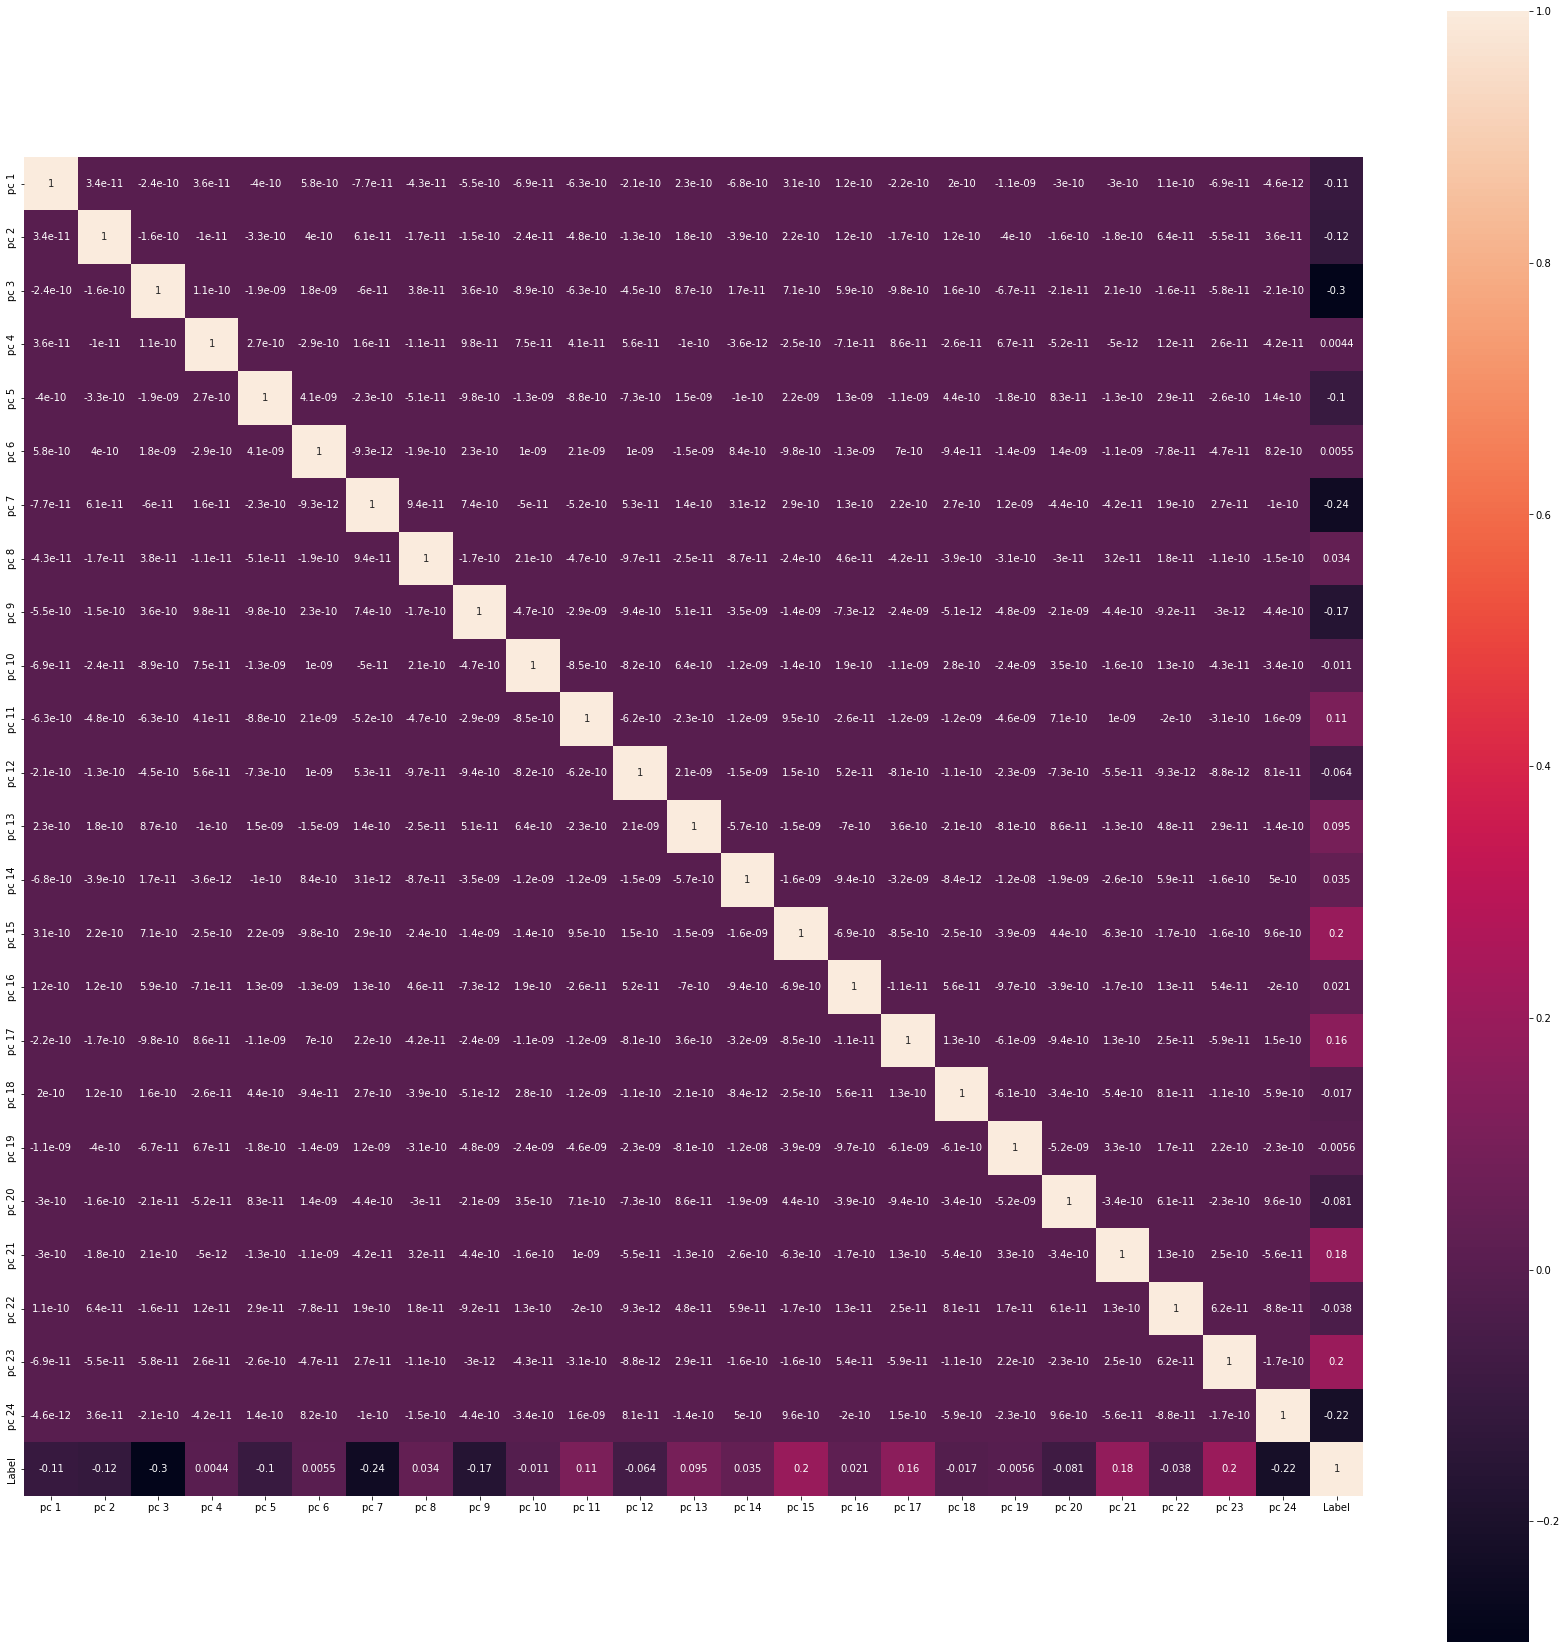

In [32]:
correlation_matrix1 = pca_data2.corr()
fig = plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix1,square = True,annot=True)
plt.show()

In [33]:
pd.DataFrame.to_csv(pca_data2,'./review-2/pca_data2.csv')

: 